In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
#Importing CSV file from the Dataset
df=pd.read_csv('Cars24.csv')
df.head()

,Unnamed: 0,Brand,Model,Year,Variant,Location,Version,Number of Owners,KmDriven,Price
0,0,Maruti,Swift Dzire,2013,LDI BS IV Manual,New Delhi,Diesel,2nd Owner,49944,303099
1,1,Maruti,Swift,2012,VDI Manual,New Delhi,Diesel,1st Owner,129639,297999
2,2,Volkswagen,Vento,2014,HIGHLINE PETROL Manual,New Delhi,Petrol,1st Owner,62625,446899
3,3,Maruti,Ertiga,2014,VDI ABS Manual,New Delhi,Diesel,1st Owner,64013,491299
4,4,Maruti,Swift Dzire,2013,VDI BS IV Manual,New Delhi,Diesel,1st Owner,40212,370699


In [79]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [80]:
df.shape

(183, 9)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand             183 non-null    object
 1   Model             183 non-null    object
 2   Year              183 non-null    int64 
 3   Variant           183 non-null    object
 4   Location          183 non-null    object
 5   Version           183 non-null    object
 6   Number of Owners  183 non-null    object
 7   KmDriven          183 non-null    int64 
 8   Price             183 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 13.0+ KB


In [82]:
df.isnull().sum()

Brand               0
Model               0
Year                0
Variant             0
Location            0
Version             0
Number of Owners    0
KmDriven            0
Price               0
dtype: int64

In [87]:
df.replace(',','', regex=True, inplace=True) # Replacing the transmission type from name as we already have it
df['Variant'] = df['Variant'].str.replace('Manual', '')
df['Variant'] = df['Variant'].str.replace('Automatic', '')

In [88]:
df

,Brand,Model,Year,Variant,Location,Version,Number of Owners,KmDriven,Price
0,Maruti,Swift Dzire,2013,LDI BS IV,New Delhi,Diesel,2nd Owner,49944,303099
1,Maruti,Swift,2012,VDI,New Delhi,Diesel,1st Owner,129639,297999
2,Volkswagen,Vento,2014,HIGHLINE PETROL,New Delhi,Petrol,1st Owner,62625,446899
3,Maruti,Ertiga,2014,VDI ABS,New Delhi,Diesel,1st Owner,64013,491299
4,Maruti,Swift Dzire,2013,VDI BS IV,New Delhi,Diesel,1st Owner,40212,370699
...,...,...,...,...,...,...,...,...,...
178,Maruti,Dzire,2017,VDI,Mumbai,Diesel,1st Owner,107185,695799
179,Maruti,Baleno,2016,ZETA 1.2 K12 CVT,Mumbai,Petrol,1st Owner,5318,741599
180,Maruti,IGNIS,2017,ZETA 1.2 K12 AMT,Mumbai,Petrol,2nd Owner,31550,520799
181,Maruti,Dzire,2018,ZDI Plus,Mumbai,Diesel,2nd Owner,30200,799999


In [89]:
df.nunique()

Brand                 6
Model                34
Year                 14
Variant              74
Location              8
Version               3
Number of Owners      3
KmDriven            143
Price               137
dtype: int64

## EDA

#### Univeraite Analysis

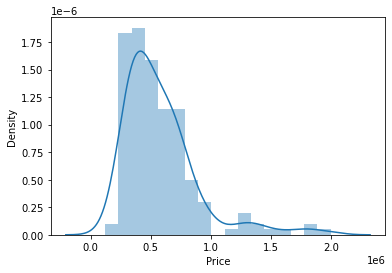

In [90]:
#checking the Target column
sns.distplot(df['Price'])
plt.show()

As from above plot we see data is not normally distributed

<AxesSubplot:xlabel='Version', ylabel='count'>

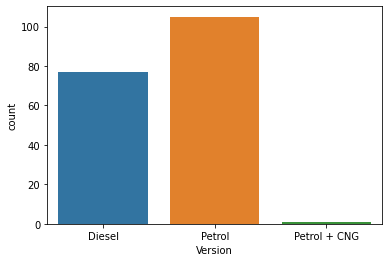

In [91]:
sns.countplot(x = 'Version', data = df)

<AxesSubplot:xlabel='Year', ylabel='count'>

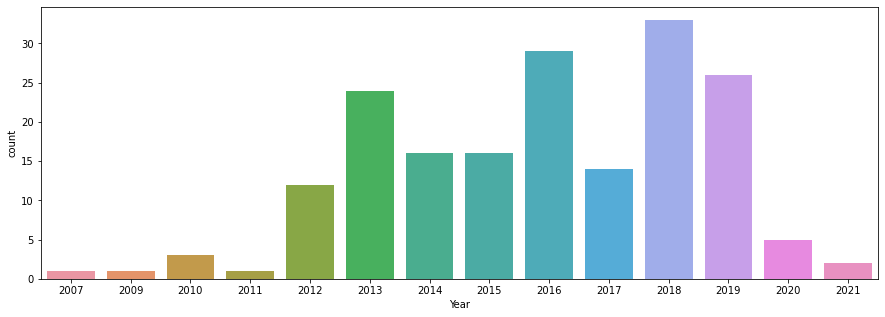

In [92]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Year', data = df)

From above plot we see in between 2012 to 2019 ,count of cars are more as compared to rest of the years.

<AxesSubplot:xlabel='Brand', ylabel='count'>

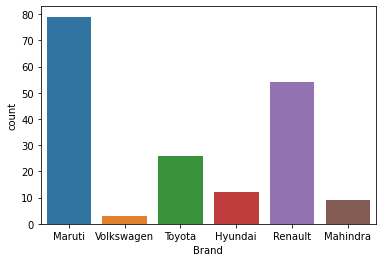

In [93]:
sns.countplot(x = 'Brand', data = df)

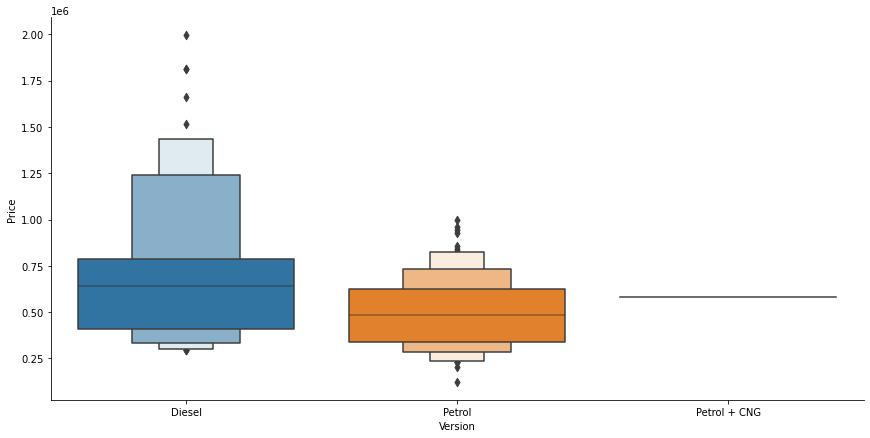

In [94]:
# Relation between price nad fuel

sns.catplot(y = 'Price', x = 'Version',data= df.sort_values("Price", ascending = False), 
            kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

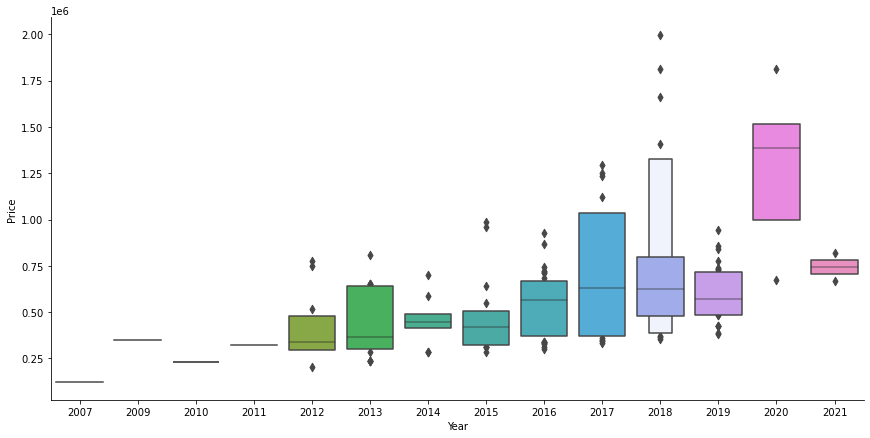

In [95]:
# Relation between Price and Manufacturing year

sns.catplot(y ='Price', x ='Year',data=df.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=2)
plt.tight_layout
plt.show()

## Heatmap

In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Brand']=le.fit_transform(df['Brand'])
df['Model']=le.fit_transform(df['Model'])
df['Year']=le.fit_transform(df['Year'])
df['Variant']=le.fit_transform(df['Variant'])
df['Location']=le.fit_transform(df['Location'])
df['Version']=le.fit_transform(df['Version'])
df['Number of Owners']=le.fit_transform(df['Number of Owners'])

In [97]:
df

,Brand,Model,Year,Variant,Location,Version,Number of Owners,KmDriven,Price
0,2,24,5,26,5,0,1,49944,303099
1,2,23,4,49,5,0,0,129639,297999
2,5,26,6,24,5,1,0,62625,446899
3,2,9,6,50,5,0,0,64013,491299
4,2,24,5,51,5,0,0,40212,370699
...,...,...,...,...,...,...,...,...,...
178,2,7,9,49,4,0,0,107185,695799
179,2,2,8,70,4,1,0,5318,741599
180,2,14,9,69,4,1,1,31550,520799
181,2,7,10,66,4,0,1,30200,799999


In [98]:
df.describe()

,Brand,Model,Year,Variant,Location,Version,Number of Owners,KmDriven,Price
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02
mean,2.448087,16.273224,7.901639,37.218579,3.803279,0.584699,0.147541,55231.972678,5.774444e+05
std,1.061972,8.786334,2.612554,18.434210,1.956839,0.505123,0.399288,45490.437051,3.100881e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2400.000000,1.203990e+05
25%,2.000000,8.000000,6.000000,25.500000,2.000000,0.000000,0.000000,25650.500000,3.648990e+05
50%,2.000000,17.000000,8.000000,39.000000,4.000000,1.000000,0.000000,44638.000000,5.045990e+05
75%,3.000000,24.000000,10.000000,51.000000,5.000000,1.000000,0.000000,64361.000000,6.846990e+05
max,5.000000,33.000000,13.000000,73.000000,7.000000,2.000000,2.000000,353288.000000,1.997999e+06


In [20]:
df.corr()

,Brand,Model,Year,Variant,Location,Version,Number of Owners,KmDriven,Price
Brand,1.000000,-0.118009,0.083306,-0.387299,0.135190,0.164444,0.037599,0.115463,0.105054
Model,-0.118009,1.000000,-0.129036,0.027718,-0.156642,-0.230561,0.047960,0.081666,0.026788
Year,0.083306,-0.129036,1.000000,-0.074050,-0.142449,0.293634,-0.175630,-0.610420,0.466907
Variant,-0.387299,0.027718,-0.074050,1.000000,-0.134668,-0.110573,-0.161166,-0.144811,0.029458
Location,0.135190,-0.156642,-0.142449,-0.134668,1.000000,-0.016403,-0.096260,0.089553,-0.229075
Version,0.164444,-0.230561,0.293634,-0.110573,-0.016403,1.000000,-0.103164,-0.460520,-0.299948
Number of Owners,0.037599,0.047960,-0.175630,-0.161166,-0.096260,-0.103164,1.000000,0.077605,-0.103484
KmDriven,0.115463,0.081666,-0.610420,-0.144811,0.089553,-0.460520,0.077605,1.000000,-0.109102
Price,0.105054,0.026788,0.466907,0.029458,-0.229075,-0.299948,-0.103484,-0.109102,1.000000


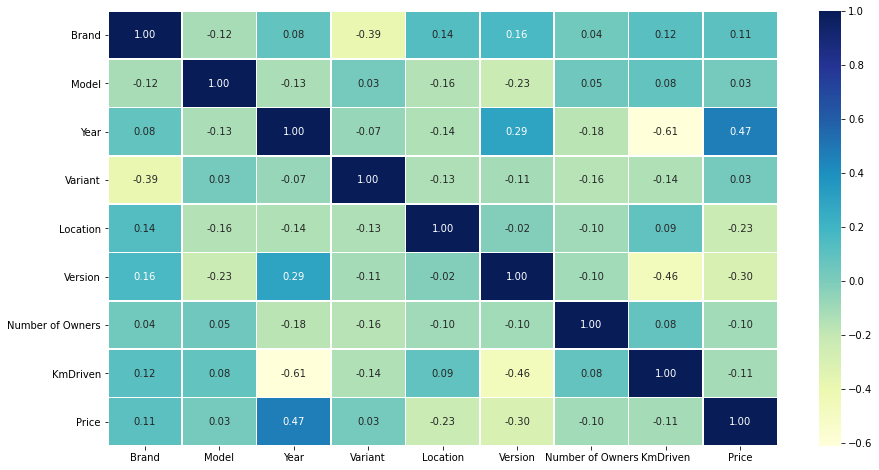

In [21]:
#Let's check the correlation by using the Heatmap (in order to check teh relation between features)

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='YlGnBu',annot = True, linewidth=0.5, fmt='.2f')
plt.show()

Price is correlated with Year

<Figure size 432x288 with 0 Axes>

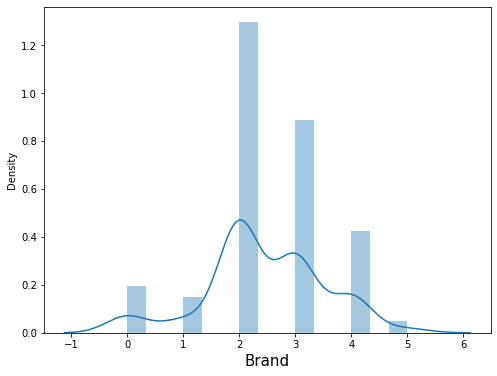

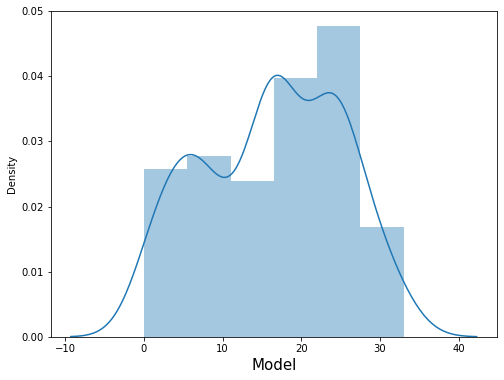

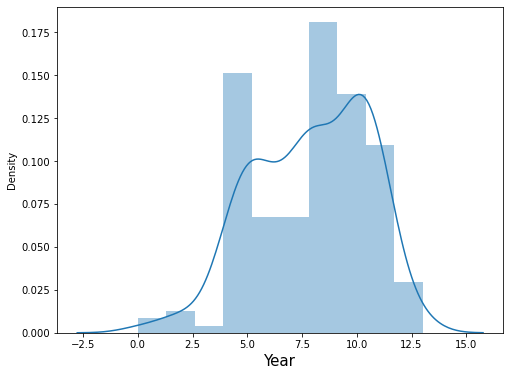

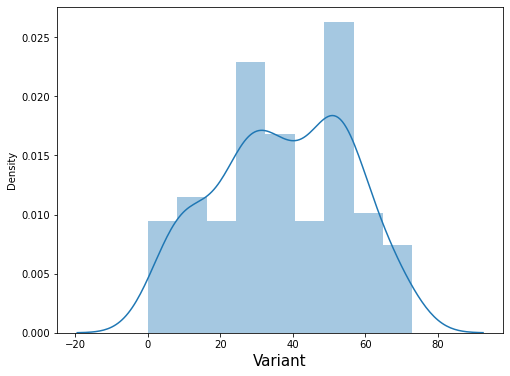

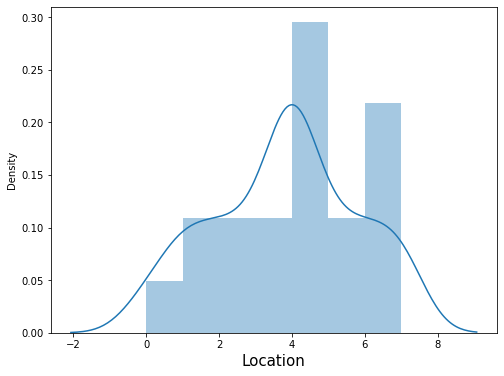

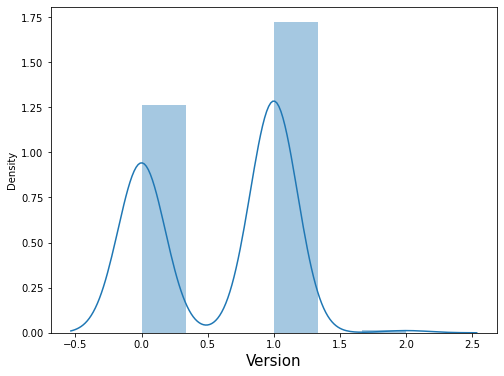

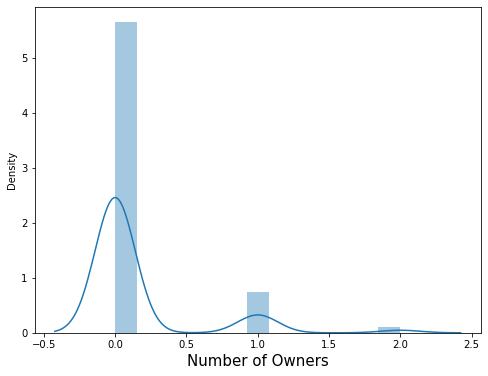

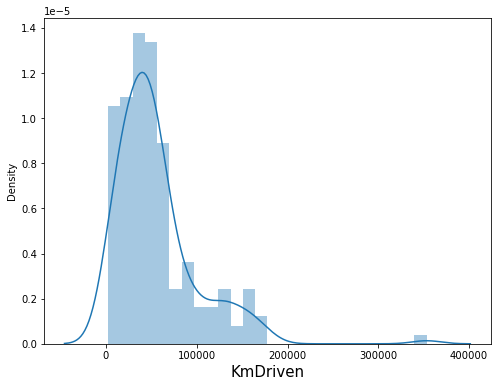

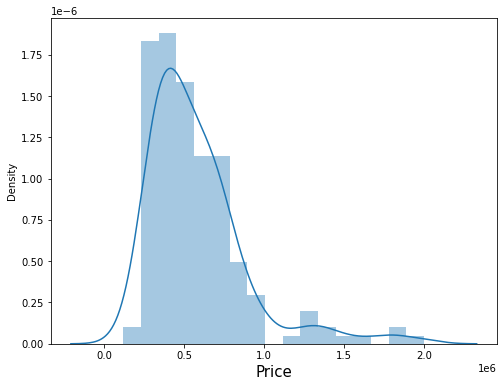

In [22]:
plt.tight_layout()
for i in df:
    plt.figure(figsize=[8,6])
    sns.distplot(df[i])
    plt.xlabel(i,fontsize=15)
plt.show()

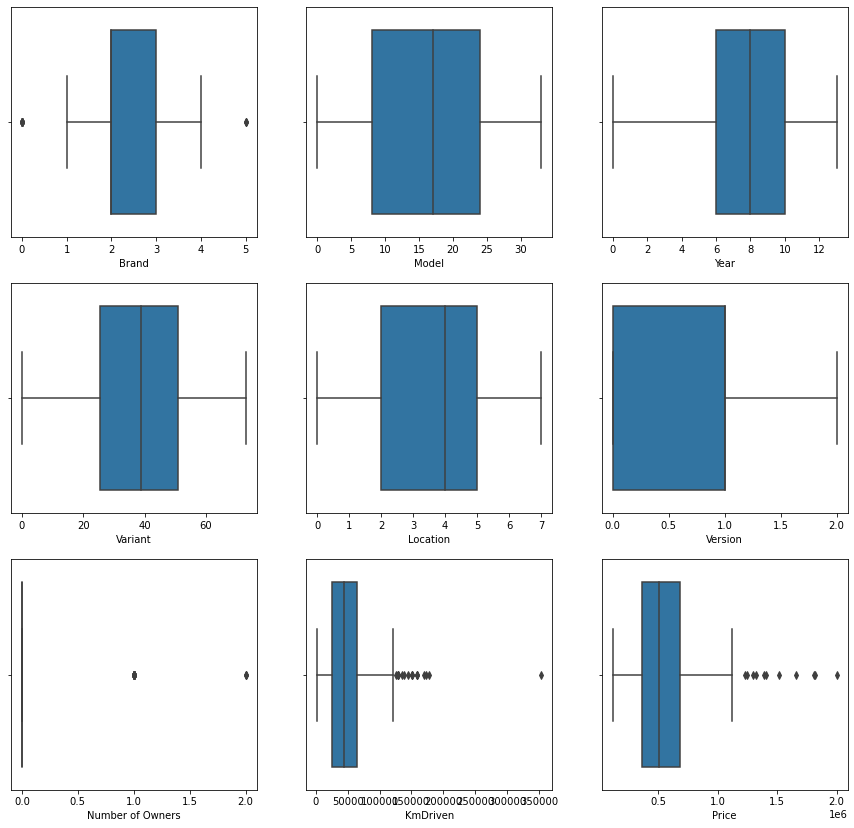

In [23]:
#visualizing data for outliers
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
    graph+=1
plt.show()

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(183, 9)

In [25]:
threshold=3
print(np.where(z>3))

(array([ 66,  75, 119, 120, 128, 133, 155, 161, 163, 163], dtype=int64), array([6, 6, 8, 7, 8, 8, 8, 8, 2, 6], dtype=int64))


In [26]:
df_new=df[(z<3).all(axis=1)]
print('Old DataFrame',df.shape)
print('New DataFrame',df_new.shape)
print('total_dropped_rows',df.shape[0]-df_new.shape[0])

Old DataFrame (183, 9)
New DataFrame (174, 9)
total_dropped_rows 9


In [27]:
loss_percentage=(183-174)/183*100
print(loss_percentage,'%')

4.918032786885246 %


In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Brand                    1.0
Model                   16.0
Year                     4.0
Variant                 25.5
Location                 3.0
Version                  1.0
Number of Owners         0.0
KmDriven             38710.5
Price               319800.0
dtype: float64


In [29]:
df1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df1.shape)

(122, 9)


In [30]:
percentage_loss=((183-122)/183)*100
print(percentage_loss)

33.33333333333333


while checking outliers, data loss is less while using zscore

In [31]:
df.skew()

Brand              -0.252247
Model              -0.153400
Year               -0.396043
Variant            -0.132563
Location           -0.121074
Version            -0.217059
Number of Owners    2.754882
KmDriven            2.313873
Price               1.994912
dtype: float64

In [32]:
df_new.skew()

Brand              -0.255364
Model              -0.150630
Year               -0.286374
Variant            -0.172366
Location           -0.117406
Version            -0.264119
Number of Owners    2.349026
KmDriven            1.208893
Price               1.277800
dtype: float64

In [33]:
x = df_new.drop(columns = 'Price') #Features
y = df_new['Price'] #Label

In [34]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_scaled=s.fit_transform(x)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=100)

In [41]:
max_acc=0
max_RS=0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    pred=rf.predict(X_test)
    r2=r2_score(y_test,pred)*100
    
    if r2>max_acc:
        max_acc=r2
        max_RS=i
print('Best R2 score is',max_acc, 'on random state', max_RS)

Best R2 score is 95.82099772134552 on random state 76


In [43]:
# Regression Model Function
def reg(model,x,y):
    X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=76)
    
    # Training the model
    model.fit(X_train,y_train)
    
    # Predicting Y_test
    pred=model.predict(X_test)
    
     # R2 score
    r2 = r2_score(y_test, pred)*100
    print("R2 Score is:", r2)
    
    print('MAE:',metrics.mean_absolute_error(y_test,pred))
    print('MSE:',metrics.mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,pred)))
    
    # Cross Validation Score
    cv_score = (cross_val_score(model,x_scaled,y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [46]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# Random Forest regressor
model=RandomForestRegressor()
reg(model,x_scaled,y)

R2 Score is: 95.2766385647339
MAE: 33618.42857142857
MSE: 2202942852.542857
RMSE 46935.5180278524
Cross Validation Score: 40.11359802349554
R2 Score - Cross Validation Score is 55.16304054123836


In [55]:
# Decision tree Regressor
model=DecisionTreeRegressor()
reg(model,x_scaled,y)

R2 Score is: 91.54583482398874
MAE: 39905.71428571428
MSE: 3942963714.285714
RMSE 62793.02281532331
Cross Validation Score: 15.378783508612514
R2 Score - Cross Validation Score is 76.16705131537623


In [48]:
model=KNeighborsRegressor()
reg(model,x_scaled,y)

R2 Score is: 82.23846498409709
MAE: 67963.42857142857
MSE: 8283856137.142858
RMSE 91015.691708314
Cross Validation Score: -36.42834086925211
R2 Score - Cross Validation Score is 118.6668058533492


In [57]:
model=AdaBoostRegressor()
reg(model,x_scaled,y)

R2 Score is: 85.98672210846581
MAE: 63523.90267738596
MSE: 6535695138.924492
RMSE 80843.64624956307
Cross Validation Score: 6.226641053683648
R2 Score - Cross Validation Score is 79.76008105478216


In [50]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
reg(model,x_scaled,y)

R2 Score is: 43.27029427884456
MAE: 123011.50751826476
MSE: 26458339353.87551
RMSE 162660.1959726949
Cross Validation Score: -81.16551687009795
R2 Score - Cross Validation Score is 124.4358111489425


In [51]:
# test dataset percentage
metrics.r2_score(y_test,pred)

0.8383201764436679

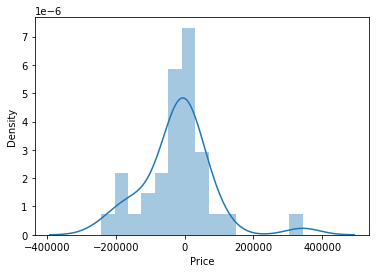

In [52]:
sns.distplot(y_test-pred)
plt.show()

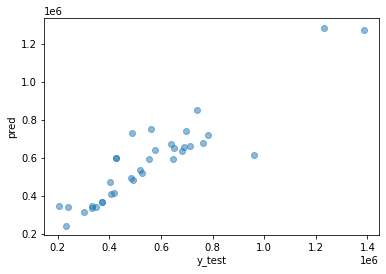

In [54]:
plt.scatter(y_test,pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

In [65]:
#Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
#List of parameters to pass
n_estimators = [10,50,100]
loss=['linear','square','exponential']
#max_features = ['auto', 'sqrt']
#max_depth = [2, 3, 5]
#min_samples_split = [2, 4, 6]
#min_samples_leaf = [1, 2, 4, 6]
learning_rate=[0.1]

In [68]:
#Creating random grid
ab=AdaBoostRegressor()
random_grid = {'n_estimators': n_estimators,
               'loss':loss,
               'learning_rate':learning_rate}

In [69]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
ab_random = RandomizedSearchCV(estimator = ab, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=76)

In [73]:
ab.fit(X_train,y_train)
y_pred=ab.predict(X_test)

In [74]:
ab_random.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.1s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, loss=linear, n_est

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [10, 50, 100]},
                   random_state=76, scoring='neg_mean_squared_error',
                   verbose=2)

In [75]:
ab_random.best_params_

{'n_estimators': 100, 'loss': 'square', 'learning_rate': 0.1}

In [76]:
ab=AdaBoostRegressor(n_estimators=100,loss='square',learning_rate=0.1)
ab.fit(X_train,y_train)
ab.score(X_train,y_train)
pred=ab.predict(X_test)
abr=r2_score(y_test,pred)
print('R2 score:',abr*100)

R2 score: 77.84919541899849


R2 score after hyper parameter tuning is 77%